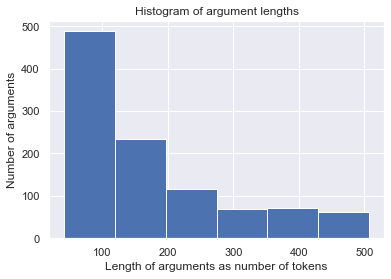

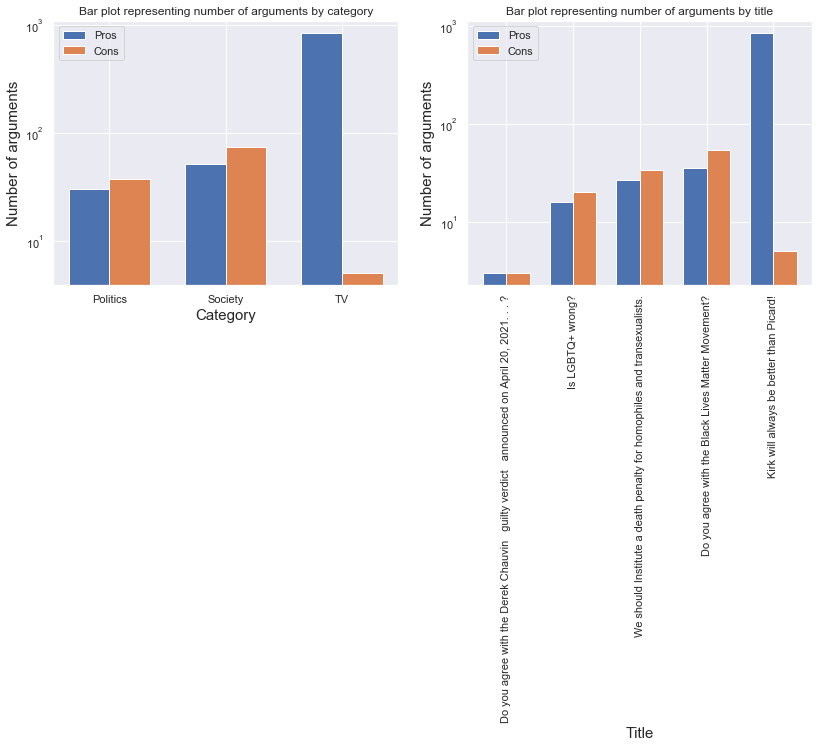

In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mplcursors

# open and load the json file that is generated from the given website using scrapy
path='data.json'
f=open(path, encoding='utf8')
json_data=json.load(f)

sns.set()

# declaration of required lists
token_size_lst=[]
categ_lst=[]
title_lst=[]
title_pros=[]
title_cons=[]
categ_pros=[0,0,0,0,0]
categ_cons=[0,0,0,0,0]


# function to tokenize the selected argument and returns the number of tokens generated from the same argument
def tokenization(sentence):
    return len(sentence.split())


# function to calculate the number of tokens of every argument an returns the list containing length of those arguments 
def Argument_Length(json_data):
    for i in range(0,5):
        for j in range(0, len(json_data[i]['pro_arguments'])):
            arg_size=tokenization(json_data[i]['pro_arguments'][j]['body']) 
            token_size_lst.append(arg_size) # appends the number of tokens of a single pro-argument to the list
        
        for k in range(0, len(json_data[i]['con_arguments'])):
            arg_size=tokenization(json_data[i]['con_arguments'][k]['body'])
            token_size_lst.append(arg_size) # appends the number of tokens of a single con-argument to the list
    return token_size_lst


# function to calculate the number of arguments (both pros and cons) of each title and category
# and returns topic list, category list and the lists that contain number of arguments for each topic and category
def Category_Title(json_data):
    for i in range(0,5):
        categ_str=json_data[i]['category'] 
        title_lst.append(json_data[i]['topic']) # appends all the debate topics to the list
        #appends the number of pro arguments and con arguments of each topic to the lists
        title_pros.append(len(json_data[i]['pro_arguments']))
        title_cons.append(len(json_data[i]['con_arguments']))  
        
        #checks if the category is already present in the list
        if categ_str not in categ_lst:
            categ_lst.append(categ_str) # appends all the distinct categories to the list
        
        for j in range(0,len(categ_lst)):
            if categ_str==categ_lst[j]:
                #calculates the number of pro arguments and con arguments of each category to the lists
                pros_args=categ_pros[j]+len(json_data[i]['pro_arguments'])
                categ_pros[j]=pros_args
                cons_args=categ_cons[j]+len(json_data[i]['con_arguments'])
                categ_cons[j]=cons_args
    del categ_pros[len(categ_lst):]
    del categ_cons[len(categ_lst):]
    return title_lst, title_pros, title_cons, categ_lst, categ_pros, categ_cons


# function calls to perform their respective tasks
token_size_lst = Argument_Length(json_data)
(title_lst, title_pros, title_cons, categ_lst, categ_pros, categ_cons) = Category_Title(json_data)


# creates histogram of argument lengths 
plt.hist(token_size_lst,bins=6)
plt.title('Histogram of argument lengths')
plt.xlabel('Length of arguments as number of tokens')
plt.ylabel('Number of arguments')
plt.savefig('arguments.png',dpi=100, quality=500)
plt.show()


bar_width=0.35
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
fig.tight_layout(pad=3.0)

# creates a bar graph that represents the number of pro and con arguments by categories
indx1 = np.arange(len(categ_lst))
ax1.bar(indx1-bar_width/2, categ_pros, bar_width, label='Pros')
ax1.bar(indx1+bar_width/2, categ_cons, bar_width, label='Cons')
ax1.set_xticks(indx1)
ax1.set_xticklabels(categ_lst)
ax1.set_yscale('log')
ax1.set_title('Bar plot representing number of arguments by category')
ax1.set_xlabel('Category', fontsize=15)
ax1.set_ylabel('Number of arguments', fontsize=15)
mplcursors.cursor(hover=True)
ax1.legend()

# creates a bar graph that represents the number of pro and con arguments by titles
indx2 = np.arange(len(title_lst))
ax2.bar(indx2-bar_width/2, title_pros, bar_width, label='Pros')
ax2.bar(indx2+bar_width/2, title_cons, bar_width, label='Cons')
ax2.set_xticks(indx2)
ax2.set_xticklabels(title_lst, rotation=90)
ax2.set_yscale('log')
ax2.set_title('Bar plot representing number of arguments by title')
ax2.set_xlabel('Title', fontsize=15)
ax2.set_ylabel('Number of arguments', fontsize=15)
mplcursors.cursor(hover=True)
ax2.legend()
fig.savefig('pro_con.png', dpi=100, quality=500, bbox_inches='tight')
plt.show()